In [1]:
# 1. Preprocessing
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error,mean_squared_error
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge

df = pd.read_csv('AMR.csv')
df1 = pd.read_csv('MissingCountries.csv')

# Check for column info and null values
df.info()
print(df.isnull().sum()/df.shape[0])

# Convert categorical features to numeric features
labelencoder = LabelEncoder()
df['Countries'] = labelencoder.fit_transform(df['Countries'])
df['Continent'] = labelencoder.fit_transform(df['Continent'])
df['Development_level'] = labelencoder.fit_transform(df['Development_level'])

df1['Countries'] = labelencoder.fit_transform(df1['Countries'])
df1['Continent'] = labelencoder.fit_transform(df1['Continent'])
df1['Development_level'] = labelencoder.fit_transform(df1['Development_level'])
print(df.info())

X = df.iloc[:,0:7]

y_female = df.iloc[:,7]
y_male = df.iloc[:,8]
y_avg = df.iloc[:,9]

X1 = df1.iloc[:,0:7]

y_female1 = df1.iloc[:,7]
y_male1 = df1.iloc[:,8]
y_avg1 = df1.iloc[:,9]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Countries                           156 non-null    object 
 1   Continent                           156 non-null    object 
 2   Average_Pop(thousands people)       156 non-null    float64
 3   Average_GDP(M$)                     156 non-null    float64
 4   Average_GDP_per_capita($)           156 non-null    float64
 5   Average_HEXP($)                     156 non-null    float64
 6   Development_level                   156 non-null    object 
 7   AMR_female(per_1000_female_adults)  156 non-null    float64
 8   AMR_male(per_1000_male_adults)      156 non-null    float64
 9   Average_CDR                         156 non-null    float64
dtypes: float64(7), object(3)
memory usage: 12.3+ KB
Countries                             0.0
Continent           

In [10]:
# First Model: Female Mortality Rate

# Split data
X_train_f,X_test_f,y_train_f,y_test_f = train_test_split(X,
                                                 y_female,
                                                 test_size=0.2,
                                                 random_state=42)

print(X_train_f.shape)
print(X_test_f.shape)

# normalize features
normalizer = StandardScaler()
X_train_f = normalizer.fit_transform(X_train_f)
X_test_f = normalizer.transform(X_test_f)

X1 = normalizer.transform(X1)

# Train the model

lrf = LinearRegression()

lrf.fit(X_train_f,y_train_f)

print("bias is "+str(lrf.intercept_))
print("coefficients  is "+str(lrf.coef_))

y_train_pred_f = lrf.predict(X_train_f)

y_train_pred_f1 = lrf.predict(X1)

mae = mean_absolute_error(y_train_pred_f,y_train_f)
mse = mean_squared_error(y_train_pred_f,y_train_f)
rmse = np.sqrt(mse)

mae11 = mean_absolute_error(y_train_pred_f1,y_female1)
mse11 = mean_squared_error(y_train_pred_f1,y_female1)
rmse11 = np.sqrt(mse11)

print('prediction for training set:')
print('MAE is: {}'.format(mae))
print('MSE is: {}'.format(mse))
print('RMSE is: {}'.format(rmse))

# Add a hyperparameter

rr = Ridge()

rr.fit(X_train_f,y_train_f)

print("bias is "+str(rr.intercept_))
print("coefficients  is "+str(rr.coef_))

y_train_pred_f = rr.predict(X_train_f)

mae1 = mean_absolute_error(y_train_pred_f,y_train_f)
mse1 = mean_squared_error(y_train_pred_f,y_train_f)
rmse1 = np.sqrt(mse1)

print('prediction for training set after hyperparameter:')
print('MAE is: {}'.format(mae1))
print('MSE is: {}'.format(mse1))
print('RMSE is: {}'.format(rmse1))

print()
print('prediction for new data:')
print('MAE is: {}'.format(mae11))
print('MSE is: {}'.format(mse11))
print('RMSE is: {}'.format(rmse11))

(124, 7)
(32, 7)
bias is 128.11685483870968
coefficients  is [ -1.33075971 -32.33555226   2.4360375  -10.94718683 -32.59953906
  10.94570018  21.1817247 ]
prediction for training set:
MAE is: 40.125663529407696
MSE is: 3111.342750243468
RMSE is: 55.77941152650741
bias is 128.11685483870968
coefficients  is [ -1.30919195 -31.91538759   2.24925924 -10.47100809 -30.05653533
   8.21642174  21.28995986]
prediction for training set after hyperparameter:
MAE is: 40.06598806410571
MSE is: 3112.2733841180393
RMSE is: 55.78775299398641

prediction for new data:
MAE is: 92.00485064324664
MSE is: 13021.130855213798
RMSE is: 114.1101698150248


/Users/heronziegel/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [11]:
# Second Model: Male Mortality Rate

# Split data
X_train_m,X_test_m,y_train_m,y_test_m = train_test_split(X,
                                                 y_male,
                                                 test_size=0.2,
                                                 random_state=42)

print(X_train_m.shape)
print(X_test_m.shape)

# normalize features
normalizer = StandardScaler()
X_train_m = normalizer.fit_transform(X_train_m)
X_test_m = normalizer.transform(X_test_m)

# Train the model

lrm = LinearRegression()

lrm.fit(X_train_m,y_train_m)

print("bias is "+str(lrm.intercept_))
print("coefficients  is "+str(lrm.coef_))

y_train_pred_m = lrm.predict(X_train_m)

y_train_pred_m1 = lrm.predict(X1)

mae_m = mean_absolute_error(y_train_pred_m,y_train_m)
mse_m = mean_squared_error(y_train_pred_m,y_train_m)
rmse_m = np.sqrt(mse_m)

mae_m11 = mean_absolute_error(y_train_pred_m1,y_male1)
mse_m11 = mean_squared_error(y_train_pred_m1,y_male1)
rmse_m11 = np.sqrt(mse_m11)

print('prediction for training set:')
print('MAE is: {}'.format(mae_m))
print('MSE is: {}'.format(mse_m))
print('RMSE is: {}'.format(rmse_m))

print()
print('prediction for new data:')
print('MAE is: {}'.format(mae_m11))
print('MSE is: {}'.format(mse_m11))
print('RMSE is: {}'.format(rmse_m11))

# Hyperparameter made the model worse so I removed it

(124, 7)
(32, 7)
bias is 198.10790322580647
coefficients  is [  0.05808066 -26.23056549   0.88707583 -13.611748   -44.1267299
   5.15672348  24.37309116]
prediction for training set:
MAE is: 51.567592010532216
MSE is: 4997.131474230678
RMSE is: 70.6903916683921

prediction for new data:
MAE is: 145.9589201131592
MSE is: 27407.829305742696
RMSE is: 165.55310116618986


In [12]:
# Third Model: Average Mortality Rate

# Split data
X_train_a,X_test_a,y_train_a,y_test_a = train_test_split(X,
                                                 y_avg,
                                                 test_size=0.2,
                                                 random_state=42)

print(X_train_a.shape)
print(X_test_a.shape)

# normalize features
normalizer = StandardScaler()
X_train_a = normalizer.fit_transform(X_train_a)
X_test_a = normalizer.transform(X_test_a)

# Train the model

lra = LinearRegression()

lra.fit(X_train_a,y_train_a)

print("bias is "+str(lra.intercept_))
print("coefficients  is "+str(lra.coef_))

y_train_pred_a = lra.predict(X_train_a)
y_train_pred_a1 = lra.predict(X1)

mae_a = mean_absolute_error(y_train_pred_a,y_train_a)
mse_a = mean_squared_error(y_train_pred_a,y_train_a)
rmse_a = np.sqrt(mse_a)

mae_a11 = mean_absolute_error(y_train_pred_a1,y_avg1)
mse_a11 = mean_squared_error(y_train_pred_a1,y_avg1)
rmse_a11 = np.sqrt(mse_a11)

print('prediction for training set:')
print('MAE is: {}'.format(mae_a))
print('MSE is: {}'.format(mse_a))
print('RMSE is: {}'.format(rmse_a))

print()
print('prediction for training set:')
print('MAE is: {}'.format(mae_a11))
print('MSE is: {}'.format(mse_a11))
print('RMSE is: {}'.format(rmse_a11))

# Hyperparameter made the model worse so I removed it

(124, 7)
(32, 7)
bias is 8.056370967741936
coefficients  is [-3.83513578e-01  3.09071809e-01  1.68552465e-03  8.42206272e-02
 -2.42149219e+00  1.94237361e+00 -8.87393072e-01]
prediction for training set:
MAE is: 1.942474411427423
MSE is: 6.90262422557635
RMSE is: 2.627284572629381

prediction for training set:
MAE is: 7.385262425510809
MSE is: 65.60292617803553
RMSE is: 8.099563332552906


Y female mean: 130.89358974358973
Y male mean: 202.38301282051282
Y average mean: 8.143653846153844

New data:
Y female mean: 128.58736842105262
Y male mean: 217.31052631578945
Y average mean: 8.705263157894738


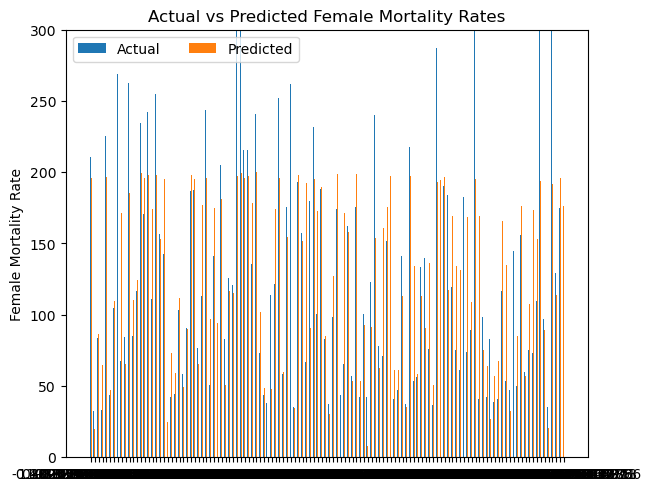

In [32]:
# Statistics and visualization

yfmean = y_female.mean()
ymmean = y_male.mean()
yamean = y_avg.mean()

yfmean1 = y_female1.mean()
ymmean1 = y_male1.mean()
yamean1 = y_avg1.mean()

print('Y female mean: {}'.format(yfmean))
print('Y male mean: {}'.format(ymmean))
print('Y average mean: {}'.format(yamean))

print()
print('New data:')
print('Y female mean: {}'.format(yfmean1))
print('Y male mean: {}'.format(ymmean1))
print('Y average mean: {}'.format(yamean1))


# Plotting double bar graph female

countries = X_train_f[:,0]
mortality_rate_f = {
    'Actual': y_train_f,
    'Predicted': y_train_pred_f,
}

x = np.arange(len(countries))  # the label locations

width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in mortality_rate_f.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1

ax.set_ylabel('Female Mortality Rate')
ax.set_title('Actual vs Predicted Female Mortality Rates')
ax.set_xticks(x + width, countries)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 300)

plt.show()

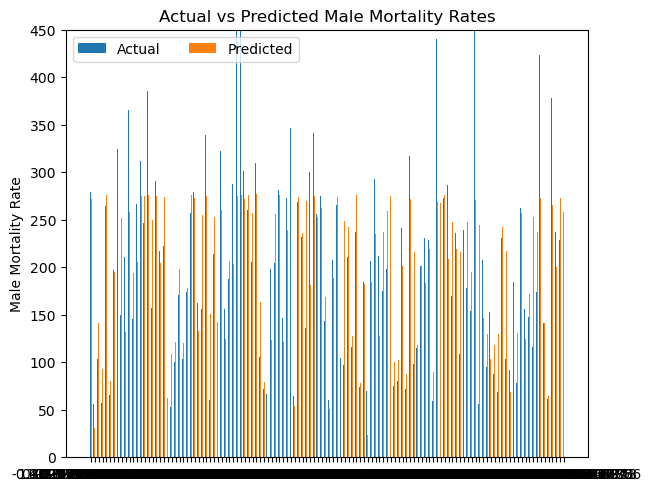

In [34]:
# Plotting double bar graph male

countries = X_train_m[:,0]
mortality_rate_m = {
    'Actual': y_train_m,
    'Predicted': y_train_pred_m,
}

x = np.arange(len(countries))  # the label locations

width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in mortality_rate_m.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1

ax.set_ylabel('Male Mortality Rate')
ax.set_title('Actual vs Predicted Male Mortality Rates')
ax.set_xticks(x + width, countries)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 450)

plt.show()

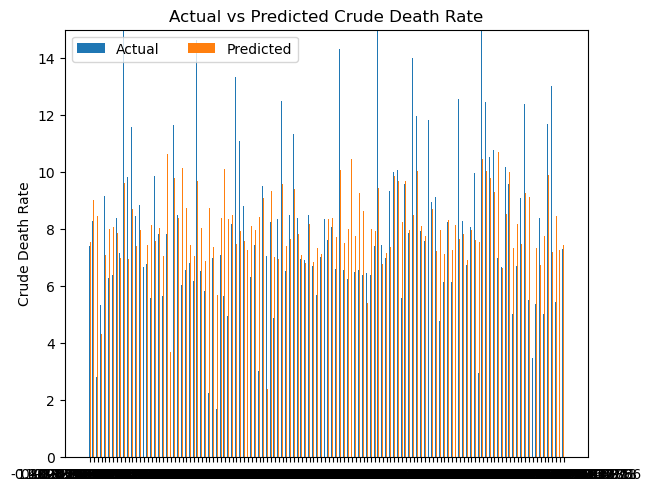

In [36]:
# Plotting double bar graph average

countries = X_train_a[:,0]
mortality_rate_a = {
    'Actual': y_train_a,
    'Predicted': y_train_pred_a,
}

x = np.arange(len(countries))  # the label locations

width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in mortality_rate_a.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1

ax.set_ylabel('Crude Death Rate')
ax.set_title('Actual vs Predicted Crude Death Rate')
ax.set_xticks(x + width, countries)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 15)

plt.show()